# Manoel Victor Lima Monteiro


### Contagem de Assinaturas


In [16]:
!pip install matplotlib


In [38]:
import numpy as np
import math
from skimage.filters import sobel
import cv2 as cv
import matplotlib.pyplot as plt

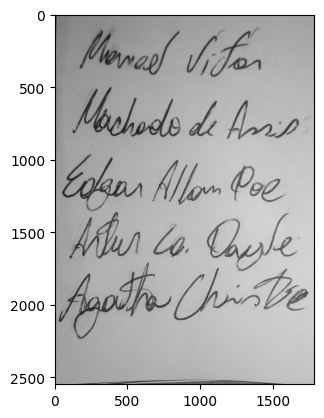

In [39]:
filename = 'listaPres.jpg'
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
plt.imshow (src,cmap='gray')
plt.show()

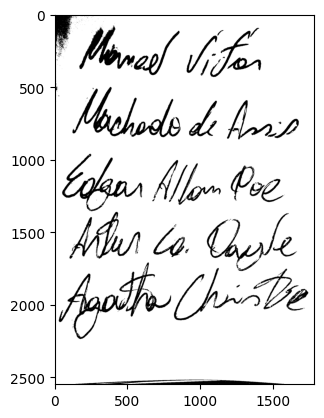

In [40]:
#binarizacao
dst = src.copy()
dst[dst<140]=0
dst[dst>0]=255

plt.imshow (dst,cmap='gray')

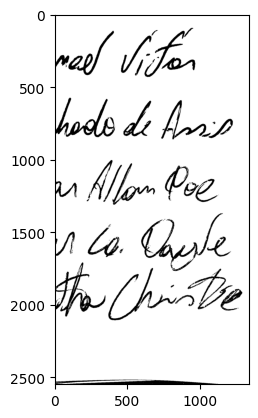

In [41]:
#recortando imagem
for i in range(3):
    dst = dst[0:,150:]

plt.imshow(dst, cmap='gray')

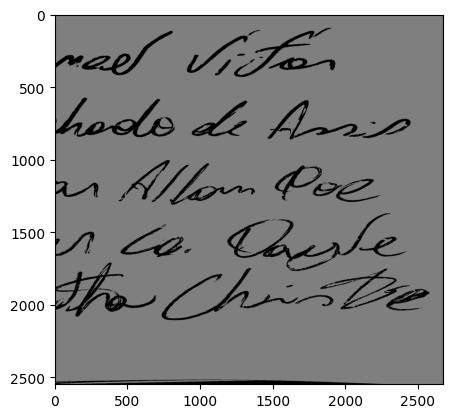

In [42]:
#dilatacao
altura, largura = dst.shape[:2]
nova_largura = int(largura * 2)
imagem_dilatada = np.zeros((altura, nova_largura), dtype=np.uint8)

for y in range(altura):
    for x in range(largura):
        imagem_dilatada[y, int(x * 2)] = dst[y, x]
plt.imshow(imagem_dilatada, cmap='gray')


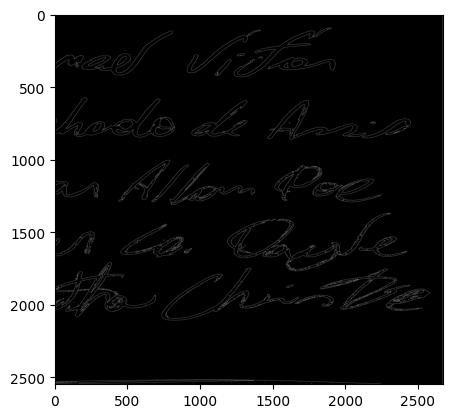

191


In [43]:
edges = sobel (imagem_dilatada)
edges = (edges*255).astype('uint8')
plt.imshow (edges,cmap='gray')
plt.show()
print(edges.max())

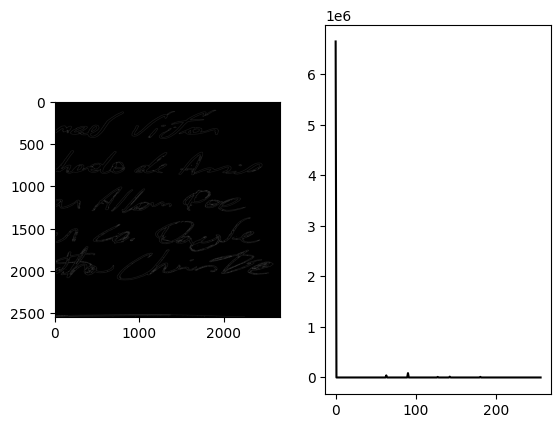

In [44]:
_,ax = plt.subplots (1,2)
ax[0].imshow (edges,cmap='gray',vmin=0,vmax=255)
h = np.histogram(edges,bins=256,range=(0,256))
ax[1].plot (h[0],'-k')


In [45]:

def contar_pixels(histograma):
    # Inicializa as contagens de pixels pretos e brancos
    pixels_pretos = histograma[0]
    pixels_brancos = histograma[-1]

    return pixels_pretos, pixels_brancos

# Chama a função para contar pixels pretos e brancos
pixels_pretos, pixels_brancos = contar_pixels(h)

pix_brancos= sum(pixels_brancos)
pix_pretos= sum(pixels_pretos)

pretos = round(pix_pretos)
brancos = round(pix_brancos)
print("Pixels pretos:", pretos)
print("Pixels brancos:", brancos)


Pixels pretos: 6813352
Pixels brancos: 32896


In [46]:
#Essa funcao foi criada por conta das imagens com pauta, pois elas dificultaram no processamento, alterando o valor
def razao_limiar(pixels_pretos, pixels_brancos, controle):
    
    
    # Calcula a divisão entre pixels pretos e brancos
    divisao = pix_pretos / pix_brancos
    
    controlador = 0
    controlador += controle
    if controlador == 0:
    #Divide o resultado da divisão por 0.5 e arredonda para o inteiro mais próximo
        resultado = round(divisao / 0.5)
    if controlador == 1:
    # Divide o resultado da divisão por 1.4 e arredonda para o inteiro mais próximo
        resultado = round(divisao / 1.4)
    
    return resultado


# Chama a função e imprime o resultado
print(razao_limiar(pretos, brancos, 0))


414


In [47]:
## [hough_line]
# iniciando a transformada de Hough
#def transformada_Hough(edg)
linhas = cv.HoughLines(edges, 1, np.pi / 100, razao_limiar(pretos, brancos,1), None, 0, 0)
# Desenhando linhas
def transformada_Hough(linhas, imagem):
    cdst = cv.cvtColor(imagem, cv.COLOR_GRAY2BGR)
    contador=0
    if linhas is not None:
        for i in range(0, len(linhas)):
            rho = linhas[i][0][0]
            theta = linhas[i][0][1]
            deg = np.degrees (theta)
            if  np.abs(deg - 90) < 10 or np.abs(deg - 270) < 10:
                a = math.cos(theta)
                b = math.sin(theta)
                x0 = a * rho
                y0 = b * rho
                pt1 = (int(x0 + 500 * (-b)), int(y0 + 1000 * (a)))
                pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
                cv.line(cdst, pt1, pt2, (0, 0, 255), 3, cv.LINE_AA)
                contador += 1
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    return cdst, contador



In [48]:
cdst, contador = transformada_Hough(linhas, edges)
if contador > 100:
        linha = cv.HoughLines(edges, 1, np.pi / 100, razao_limiar(pretos, brancos,0), None, 0, 0)
        cdst, contador = transformada_Hough(linha, edges)
        


##cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

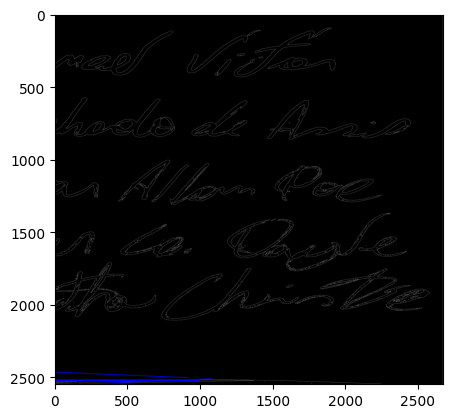

Total de assinaturas na lista: 5


In [49]:
plt.imshow(cdst)
plt.show()

print("Total de assinaturas na lista:",contador)
